In [5]:
# -*- coding: utf-8 -*-
import pandas as pd, numpy as np
from matplotlib.axes import Axes
from matplotlib.transforms import Affine2D
from matplotlib.patches import Arc
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
def draw_pitch(
    ax: Axes,
    pitch_center: tuple = (0, 0),
    pitch_length: float = 105,
    pitch_width: float = 68,
    linewidth: float = 1.2,
    linecolor="black",
    background_color=None,
    zorder: int = -10,
    orient_vertical: bool = False,
):
    """Draw a football pitch on a given axes.
    The pitch is fitted according to the provided center and width/length arguments.
    Scale is not guaranteed.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axes to draw the pitch on
    pitch_center : tuple
        Center of the pitch, by default (0, 34). The center is the point in the
        middle of the pitch, lengthwise and widthwise respectively. If orient_vertical
        is False (default), this translates to x and y axes.
    pitch_length : float
        Length of the pitch, by default 105
    pitch_width : float
        Width of the pitch, by default 68
    linewidth : float
        Width of the lines, passed to plot calls and patch initializations, by default 1.2
    linecolor : color
        Color of the lines, passed to plot calls and patch initializations, by default "black"
    background_color : color
        Color of the plot background as a matplotlib color, by default None
    zorder : int, optional
        Plotting order of the pitch on the axes, by default -10
    orient_vertical : bool, optional
        Change the pitch orientation to vertical, by default False
    """
    if orient_vertical:
        transform = Affine2D().rotate_deg(90).scale(-1, 1) + ax.transData
    else:
        transform = ax.transData
    x = lambda x: (x / 130) * pitch_length + pitch_center[0] - pitch_length / 2
    y = lambda y: (y / 90) * pitch_width + pitch_center[1] - pitch_width / 2
    rat_x = pitch_length / 130
    rat_y = pitch_width / 90
    plot_arguments = dict(
        color=linecolor, zorder=zorder, transform=transform, linewidth=linewidth
    )
    # Pitch Outline & Centre Line
    ax.plot([x(0), x(0)], [y(0), y(90)], **plot_arguments)
    ax.plot([x(0), x(130)], [y(90), y(90)], **plot_arguments)
    ax.plot([x(130), x(130)], [y(90), y(0)], **plot_arguments)
    ax.plot([x(130), x(0)], [y(0), y(0)], **plot_arguments)
    ax.plot([x(65), x(65)], [y(0), y(90)], **plot_arguments)
    # Left Penalty Area
    ax.plot([x(20), x(20)], [y(70.5), y(19.5)], **plot_arguments)
    ax.plot([x(0), x(20)], [y(70.5), y(70.5)], **plot_arguments)
    ax.plot([x(20), x(0)], [y(19.5), y(19.5)], **plot_arguments)
    # Right Penalty Area
    ax.plot([x(130), x(110)], [y(70.5), y(70.5)], **plot_arguments)
    ax.plot([x(110), x(110)], [y(70.5), y(19.5)], **plot_arguments)
    ax.plot([x(110), x(130)], [y(19.5), y(19.5)], **plot_arguments)
    # Left 6-yard Box
    ax.plot([x(0), x(6)], [y(56.16), y(56.16)], **plot_arguments)
    ax.plot([x(6), x(6)], [y(56.16), y(33.84)], **plot_arguments)
    ax.plot([x(6), x(0)], [y(33.84), y(33.84)], **plot_arguments)
    # Right 6-yard Box
    ax.plot([x(130), x(124)], [y(56.16), y(56.16)], **plot_arguments)
    ax.plot([x(124), x(124)], [y(56.16), y(33.84)], **plot_arguments)
    ax.plot([x(124), x(130)], [y(33.84), y(33.84)], **plot_arguments)

    # Prepare circles
    centre_circle = plt.Circle((x(65), y(45)), 9.15, fill=False, **plot_arguments)
    centre_spot = plt.Circle((x(65), y(45)), linewidth / 2, **plot_arguments)
    left_pen_spot = plt.Circle((x(13), y(45)), linewidth / 4, **plot_arguments)
    right_pen_spot = plt.Circle((x(117), y(45)), linewidth / 4, **plot_arguments)
    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)
    # Prepare Arcs
    left_arc = Arc(
        (x(13.5), y(45)),
        height=20.75 * rat_y,
        width=20.75 * rat_x,
        angle=0,
        theta1=312,
        theta2=48,
        **plot_arguments,
    )
    right_arc = Arc(
        (x(115.5), y(45)),
        height=20 * rat_y,
        width=20 * rat_x,
        angle=0,
        theta1=128,
        theta2=232,
        **plot_arguments,
    )
    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    if background_color is not None:
        ax.set_facecolor(background_color)

        

In [124]:
def pitch_dimensions_plotter_final():
    fig = plt.figure(figsize=(7.4, 11))
    ax = plt.gca()
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks([])
    draw_pitch(ax, orient_vertical=True, pitch_center=(0, 0))

    weight = "bold"
    ax.text(-33.5, 54, s = f"({-34},{52.5})", weight = weight)
    ax.text(24.5, 54, s = f"({34},{52.5})", weight = weight)
    ax.text(-34, -55, s = f"({-34},{-52.5})", weight = weight)
    ax.text(23.5, -55, s = f"({34},{-52.5})", weight = weight)
    ax.text(-2, 3, s = f"({0},{0})", weight = weight)

    color = "red"
    size = 75
    ax.scatter(-34, 52.5, color = color, s = size)
    ax.scatter(34, 52.5, color = color, s = size)
    ax.scatter(-34, -52.5, color = color, s = size)
    ax.scatter(34, -52.5, color = color, s = size)
    ax.scatter(0, 0, color = color, s = size)

    ax.text( 0, 54.5, s = "X coordinate", va='center', ha='center', weight = weight, fontsize = 10)
    ax.text(-35.5, 0, s = "Y coordinate", rotation=90, va='center', ha='center', fontsize = 10, weight = weight)

def pitch_dimensions_plotter_event():
    fig = plt.figure(figsize=(11, 7.4))
    ax = plt.gca()
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks([])
    draw_pitch(ax, orient_vertical=False, pitch_center=(0, 0))
    
    weight = "bold"
    ax.text(40, -36.5, s = f"({1000},{1000})", weight = weight)
    ax.text(44, 35.25, s = f"({1000},{0})", weight = weight)
    ax.text(-53, 35.25, s = f"({0},{0})", weight = weight)
    ax.text(-53, -36.5, s = f"({0},{1000})", weight = weight)
    ax.text(-5, 2, s = f"({500},{500})", weight = weight)

    color = "red"
    size = 75
    ax.scatter(-52.5, -34, color = color, s = size)
    ax.scatter(52.5, 34, color = color, s = size)
    ax.scatter(52.5, -34, color = color, s = size)
    ax.scatter(-52.5, 34, color = color, s = size)
    ax.scatter(0, 0, color = color, s = size)

    ax.text( -54.5, 0, s = "Y coordinate", va='center', ha='center', weight = weight, fontsize = 10, rotation=90)
    ax.text(0, 35.5, s = "X coordinate", va='center', ha='center', fontsize = 10, weight = weight)

def pitch_dimensions_plotter_tracking():
    fig = plt.figure(figsize=(11, 7.4))
    ax = plt.gca()
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks([])
    draw_pitch(ax, orient_vertical=False, pitch_center=(0, 0))
    
    weight = "bold"
    ax.text(40, -36.5, s = f"({3400},{-5250})", weight = weight)
    ax.text(40.5, 35.25, s = f"({3400},{5250})", weight = weight)
    ax.text(-52.5, 35, s = f"({-3400},{5250})", weight = weight)
    ax.text(-53, -36.5, s = f"({-3400},{-5250})", weight = weight)
    ax.text(-2.5, 2, s = f"({0},{0})", weight = weight)

    color = "red"
    size = 75
    ax.scatter(-52.5, -34, color = color, s = size)
    ax.scatter(52.5, 34, color = color, s = size)
    ax.scatter(52.5, -34, color = color, s = size)
    ax.scatter(-52.5, 34, color = color, s = size)
    ax.scatter(0, 0, color = color, s = size)

    ax.text( -54.5, 0, s = "Y coordinate", va='center', ha='center', weight = weight, fontsize = 10, rotation=90)
    ax.text(0, 35.5, s = "X coordinate", va='center', ha='center', fontsize = 10, weight = weight)

In [40]:
def pitch_segmentation():
        fig = plt.figure(figsize=(6.8, 10.5))
        ax = plt.gca()
        ax.set_facecolor('white')
        ax.set_xticks([])
        ax.set_yticks([])
        draw_pitch(ax, orient_vertical=True, pitch_center=(0, 0))

        line_width = 0.5
        edge_color = "black"
        facecolors = ["#ffeda0", "#feb24c", "#f03b20", "maroon"] 
        alpha = 0.6
        
        first_third = patches.Rectangle((-34, -52.5), 68, 35, linewidth= line_width, edgecolor= edge_color, facecolor= facecolors[0], alpha= alpha)
        ax.add_patch(first_third)
        second_third = patches.Rectangle((-34, -17.5), 68, 35, linewidth= line_width, edgecolor= edge_color, facecolor= facecolors[1], alpha= alpha)
        ax.add_patch(second_third)
        final_third = patches.Rectangle((-34, 17.5), 68 , 35 , linewidth= line_width, edgecolor= edge_color, facecolor= facecolors[2], alpha= alpha)
        ax.add_patch(final_third)
        penalty_box = patches.Rectangle((-19.5, 36.25), 39 , 16 , linewidth= line_width, edgecolor= edge_color, facecolor= facecolors[3], alpha= alpha)
        ax.add_patch(penalty_box)

        linetextfont = 10
        ax.text(0, 54, "y = 52.5", fontsize = linetextfont, va='center', ha='center')
        ax.text(0, 19, "y = 17.5", fontsize = linetextfont, va='center', ha='center')
        ax.text(0, -16, "y = -17.5", fontsize = linetextfont, va='center', ha='center')
        ax.text(0, -50, "y = -52.5", fontsize = linetextfont, va='center', ha='center')

        zonetextfont = 11
        weight = "bold"
        ax.text(0, -30, "Defensive Third", fontsize = zonetextfont, va='center', ha='center', weight = weight)
        ax.text(0, -2.5, "Midfield Third", fontsize = zonetextfont, va='center', ha='center', weight = weight)   
        ax.text(0, 30, "Final Third", fontsize = zonetextfont, va='center', ha='center', weight = weight)
        ax.text(0, 45, "Penalty Box", fontsize = zonetextfont, va='center', ha='center', weight = weight)

        arrow_start = [39, 31]
        arrow_end = [39, 49]
        text_x = 37
        text_y = 40

        # Add the arrow to the ax6
        ax.arrow(arrow_start[0], arrow_start[1], arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1], 
                  color='gray', width=0.4, length_includes_head=True)
        
        # Add the direction text to the ax6
        ax.text(text_x, text_y, "DIRECTION", rotation=90, va='center', ha='center', color = "gray", fontsize = 10, weight = "bold")

In [41]:
def pitch_segmentation2():
        fig = plt.figure(figsize=(6.8, 10.5))
        ax = plt.gca()
        ax.set_facecolor('white')
        ax.set_xticks([])
        ax.set_yticks([])
        draw_pitch(ax, orient_vertical=True, pitch_center=(0, 0))

        line_width = 0.5
        edge_color = "black"
        facecolors = ["#ffeda0", "#feb24c", "#f03b20", "maroon"] 
        alpha = 0.6
        
        first_third = patches.Rectangle((-34, -52.5), 68, 35, linewidth= line_width, edgecolor= edge_color, facecolor= facecolors[0], alpha= alpha)
        ax.add_patch(first_third)
        second_third = patches.Rectangle((-34, -17.5), 68, 35, linewidth= line_width, edgecolor= edge_color, facecolor= facecolors[1], alpha= alpha)
        ax.add_patch(second_third)
        final_third = patches.Rectangle((-34, 17.5), 68 , 35 , linewidth= line_width, edgecolor= edge_color, facecolor= facecolors[2], alpha= alpha)
        ax.add_patch(final_third)

        linetextfont = 10
        ax.text(0, 54, "y = 52.5", fontsize = linetextfont, va='center', ha='center')
        ax.text(0, 19, "y = 17.5", fontsize = linetextfont, va='center', ha='center')
        ax.text(0, -16, "y = -17.5", fontsize = linetextfont, va='center', ha='center')
        ax.text(0, -50, "y = -52.5", fontsize = linetextfont, va='center', ha='center')

        zonetextfont = 11
        weight = "bold"
        ax.text(0, -30, "Defensive Third", fontsize = zonetextfont, va='center', ha='center', weight = weight)
        ax.text(0, -2.5, "Midfield Third", fontsize = zonetextfont, va='center', ha='center', weight = weight)   
        ax.text(0, 30, "Final Third", fontsize = zonetextfont, va='center', ha='center', weight = weight)

        arrow_start = [39, 31]
        arrow_end = [39, 49]
        text_x = 37
        text_y = 40

        # Add the arrow to the ax6
        ax.arrow(arrow_start[0], arrow_start[1], arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1], 
                  color='gray', width=0.4, length_includes_head=True)
        
        # Add the direction text to the ax6
        ax.text(text_x, text_y, "DIRECTION", rotation=90, va='center', ha='center', color = "gray", fontsize = 10, weight = "bold")

In [12]:
def possession_control_plotter():
        """Visualize the possession control results on a horizontal bar plot.
        Parameters
        ----------
        match : match class object
            object consisting general match information.
        home_possession: float
            percent of home team in-possession.
        in_contest: float
            percent of in-contest.
        away_possession: float
            percent of away team in-possession.
        """
        category_names = ["Lille", 'Ajax']
        results = {"Possession \n Control ": [43.61, 56.39]}

        labels = list(results.keys())
        data = np.array(list(results.values()))
        data_cum = data.cumsum(axis=1)
        category_colors = ["crimson", "deepskyblue"]
        fig, ax = plt.subplots(figsize=(10, 1.3))
        legend_size = 16
        data_size = 18
        title_size = 20
        ax.invert_yaxis()
        ax.xaxis.set_visible(False)
        ax.set_xlim(0, np.sum(data, axis=1).max())

        for i, (colname, color) in enumerate(zip(category_names, category_colors)):
            widths = data[:, i]
            starts = data_cum[:, i] - widths
            rects = ax.barh(labels, widths, left=starts, height=0.5,
                            label=colname, color=color)
            text_color = "black"
            ax.bar_label(rects, labels=[f'{w}%' for w in widths], label_type='center', color=text_color, fontsize = data_size, weight = "bold")

        poss_label = ax.get_yticklabels()[0]  # Get the first label (Possession Control)
        poss_label.set_fontsize(title_size)  # Set the font size
        poss_label.set_weight("bold")
        
        ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=len(category_names), fontsize= legend_size)
        plt.show()

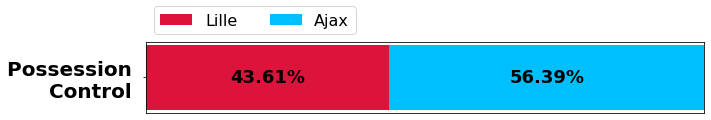

In [13]:
possession_control_plotter()